In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
sms=pd.read_csv("Spam_SMS.csv")

In [3]:
sms.head()

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.isnull().sum()

Class      0
Message    0
dtype: int64

In [5]:
sms.duplicated().sum()

415

In [6]:
sms.drop_duplicates(inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [8]:
sms['Class']=enc.fit_transform(sms['Class'])

In [9]:
sms.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


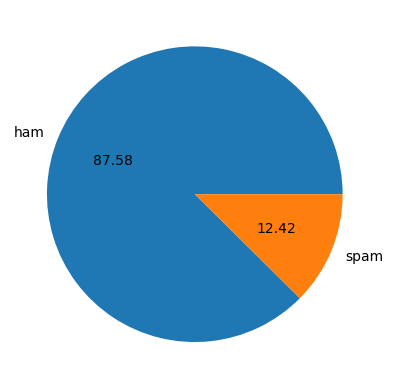

In [10]:
import matplotlib.pyplot as plt
plt.pie(sms['Class'].value_counts(),autopct='%0.2f',labels=['ham','spam'])
plt.show()

In [114]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Saiteja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Saiteja\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
sms['total_chars']=sms['Message'].apply(lambda x:len(x))

In [13]:
sms['words']=sms['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [14]:
sms.head()

,Class,Message,total_chars,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [15]:
sms['sentences']=sms['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
sms.sample(4)

,Class,Message,total_chars,words,sentences
4120,0,Hiya do u like the hlday pics looked horrible ...,116,27,3
1185,0,"Yo, you around? Just got my car back",36,10,2
627,0,How many licks does it take to get to the cent...,66,16,1
4172,0,Pls what's the full name of joke's school cos ...,124,31,1


In [17]:
sms[['total_chars','words','sentences']].describe()

,total_chars,words,sentences
count,5159.000000,5159.000000,5159.000000
mean,79.130064,18.596821,1.970731
std,58.289063,13.406675,1.455997
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='total_chars', ylabel='Count'>

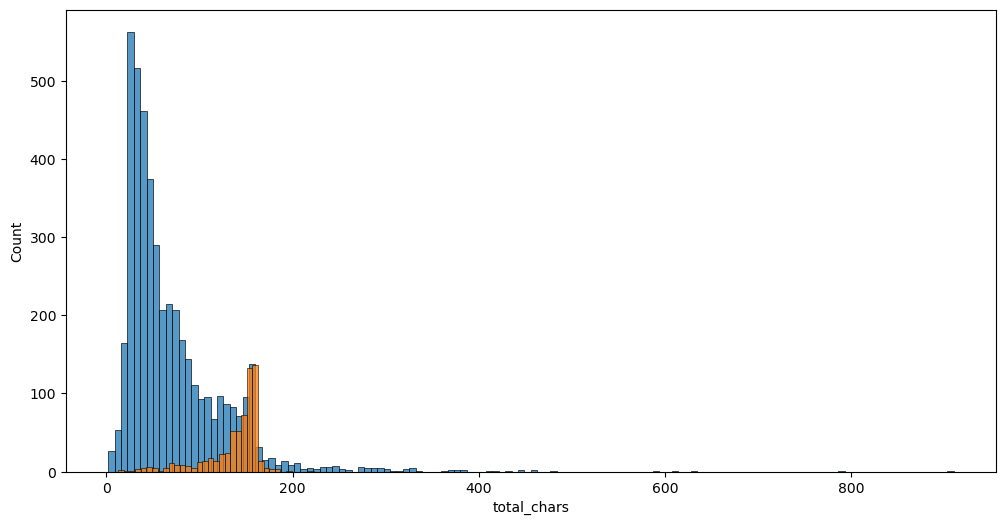

In [56]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['Class']==0]['total_chars'])
sns.histplot(sms[sms['Class']==1]['total_chars'])

<Axes: xlabel='words', ylabel='Count'>

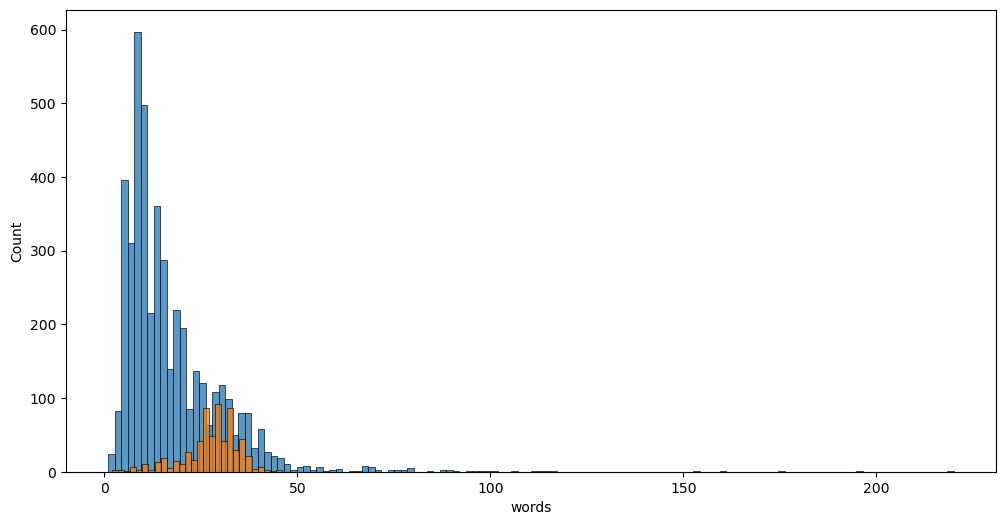

In [58]:
plt.figure(figsize=(12,6))
sns.histplot(sms[sms['Class']==0]['words'])
sns.histplot(sms[sms['Class']==1]['words'])

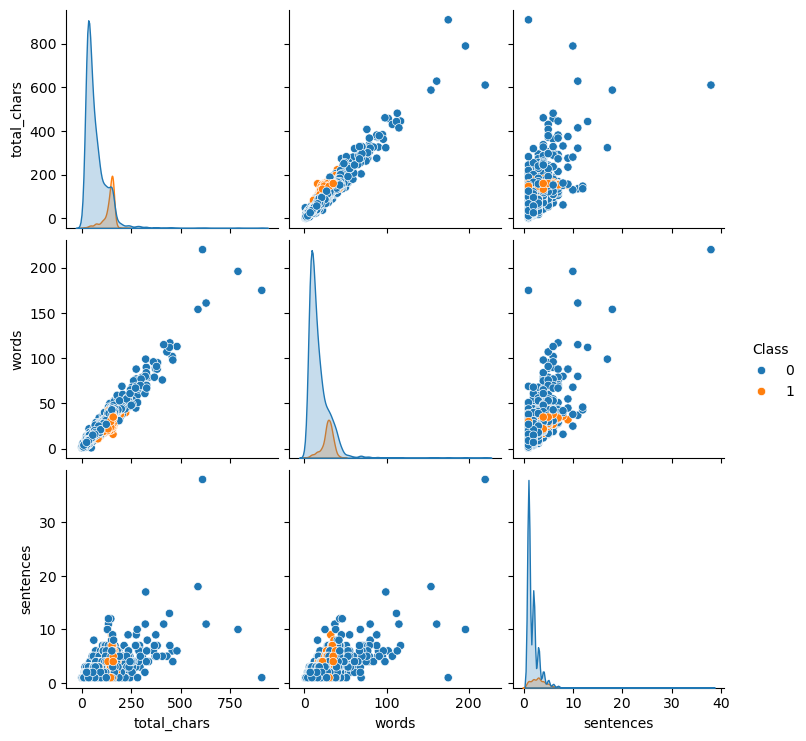

In [66]:
sns.pairplot(sms,hue='Class')

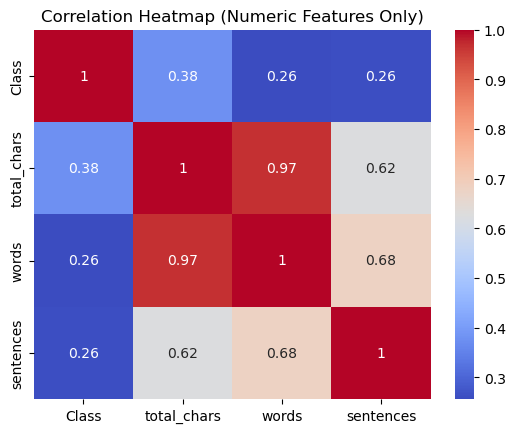

In [80]:
sns.heatmap(sms.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [140]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def lower_case(sentence):
    sent=sentence.lower()
    sent=nltk.word_tokenize(sent)
    rem=[]
    for i in sent:
        if i.isalnum() and i not in stopwords.words('english'):
            var=ps.stem(i)
            rem.append(var)
    return " ".join(rem)

In [144]:
lower_case("Hi How Are! hey? Danced paying")
sms.head()

,Class,Message,total_chars,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [148]:
sms['transform']=sms['Message'].apply(lower_case)

In [149]:
sms.head()

,Class,Message,total_chars,words,sentences,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [188]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

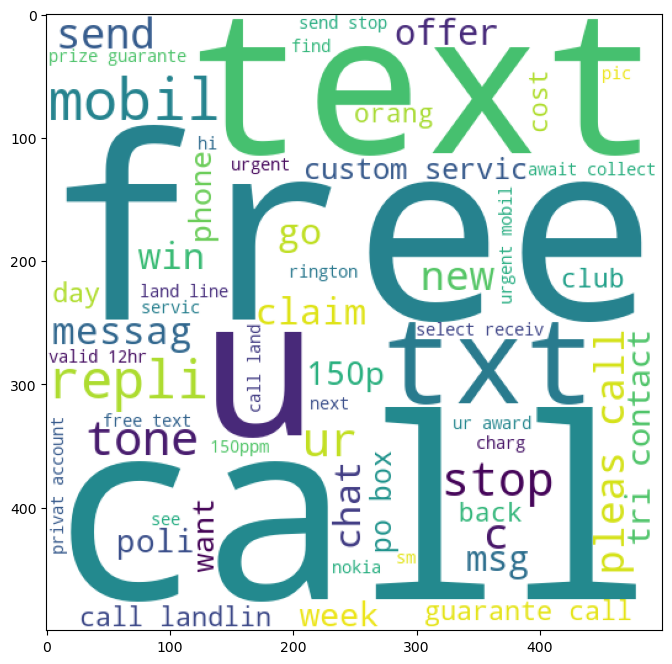

In [208]:
spam_wc=wc.generate(sms[sms['Class']==1]['transform'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

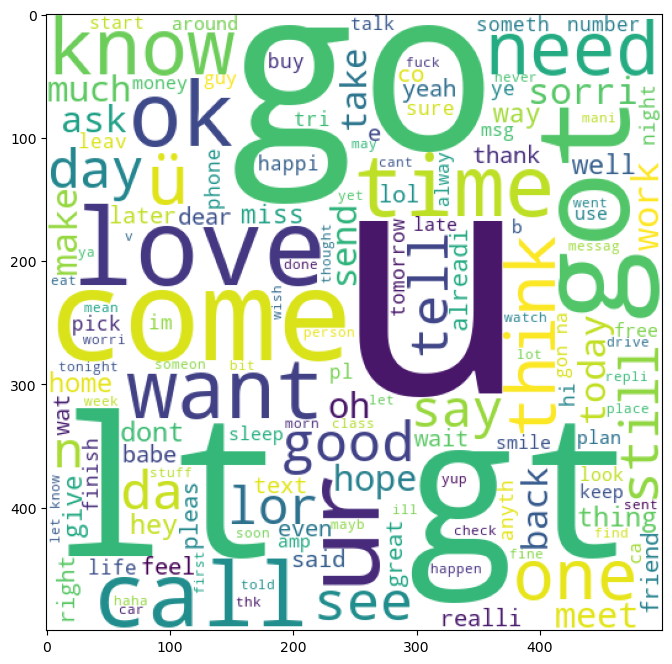

In [206]:
ham_wc=wc.generate(sms[sms['Class']==0]['transform'].str.cat(sep=' '))
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()

<Axes: xlabel='0', ylabel='1'>

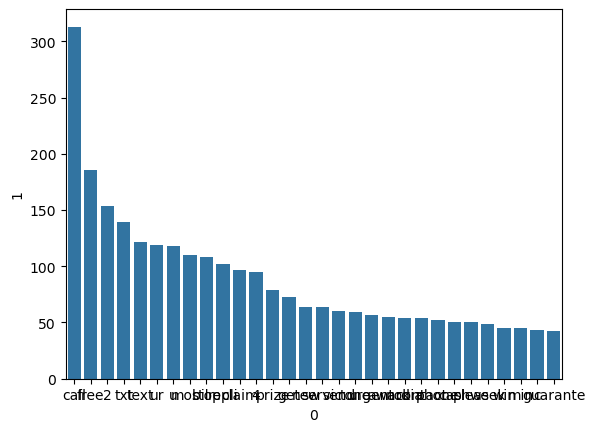

In [236]:
from collections import Counter
words=[]
for i in sms[sms['Class']==1]['transform'].tolist():
    for word in i.split():
        words.append(word)
freq=Counter(words).most_common(30)
freq=pd.DataFrame(freq)
sns.barplot(data=freq,x=0,y=1)

<Axes: xlabel='0', ylabel='1'>

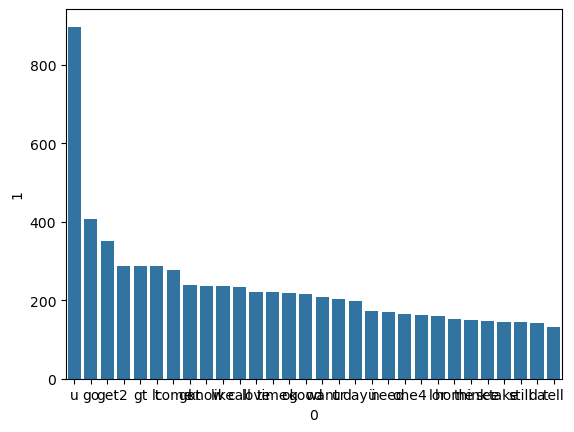

In [238]:
words=[]
for i in sms[sms['Class']==0]['transform'].tolist():
    for word in i.split():
        words.append(word)
freq=Counter(words).most_common(30)
freq=pd.DataFrame(freq)
sns.barplot(data=freq,x=0,y=1)

In [336]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=4000)

In [338]:
x=tfidf.fit_transform(sms['transform']).toarray()
x.shape

(5159, 4000)

In [340]:
y=sms['Class'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [342]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [343]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [352]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9748062015503876
1.0


In [350]:
bnb.fit(x_train,y_train)
y1_pred=bnb.predict(x_test)
print(accuracy_score(y_test,y1_pred))
print(precision_score(y_test,y1_pred))

0.9806201550387597
0.9813084112149533


In [360]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))